In [181]:
! python2 -c 'print(hash("Hello"))' && python2 -c 'print(hash("Hello"))' && python3 -c 'print(hash("Hello"))' && python3 -c 'print(hash("Hello"))'

468330442038187741
468330442038187741
-3115910535851566637
6008149831371371856


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [81]:
part= "part-0"
k1 =11779
a = """0.85-0-tc-nets.pickle 621
0.8699999999999999-0-tc-nets.pickle 534
0.89-0-tc-nets.pickle 450
0.9099999999999999-0-tc-nets.pickle 354
0.93-0-tc-nets.pickle 289
0.95-0-tc-nets.pickle 210
0.2-0-tc-nets.pickle 4272
0.4-0-tc-nets.pickle 3207
0.6-0-tc-nets.pickle 2101"""

In [82]:
def convert_output(output):
    res3 = dict()
    for r in output.split('\n'):
        g = float(r.split('-')[0])
        siz=int(r.split(' ')[-1])
        res3[g] = siz
    
    return dict(sorted(res3.items()))
    

In [83]:
res = convert_output(output=a)

## two partitions merged together

In [84]:
b = """0.8-1-tc-nets.pickle 1204
0.95-1-tc-nets.pickle 249
0.8699999999999999-1-tc-nets.pickle 730
0.93-1-tc-nets.pickle 332
0.9099999999999999-1-tc-nets.pickle 464
0.89-1-tc-nets.pickle 593
0.85-1-tc-nets.pickle 867
0.6-1-tc-nets.pickle 3255
0.2-1-tc-nets.pickle 7442
0.4-1-tc-nets.pickle 5404"""
k2=23558

In [85]:
res2 = convert_output(b)

## Part 4 results

In [86]:
c="""0.85-1-tc-nets.pickle 1182
0.89-1-tc-nets.pickle 774
0.8-1-tc-nets.pickle 1722
0.4-1-tc-nets.pickle 9012
0.6-1-tc-nets.pickle 5092
0.2-1-tc-nets.pickle 12796
0.93-1-tc-nets.pickle 442
0.9099999999999999-1-tc-nets.pickle 583
0.8699999999999999-1-tc-nets.pickle 969
0.95-1-tc-nets.pickle 307"""
k3 = 47116

In [87]:
res3 = convert_output(c)

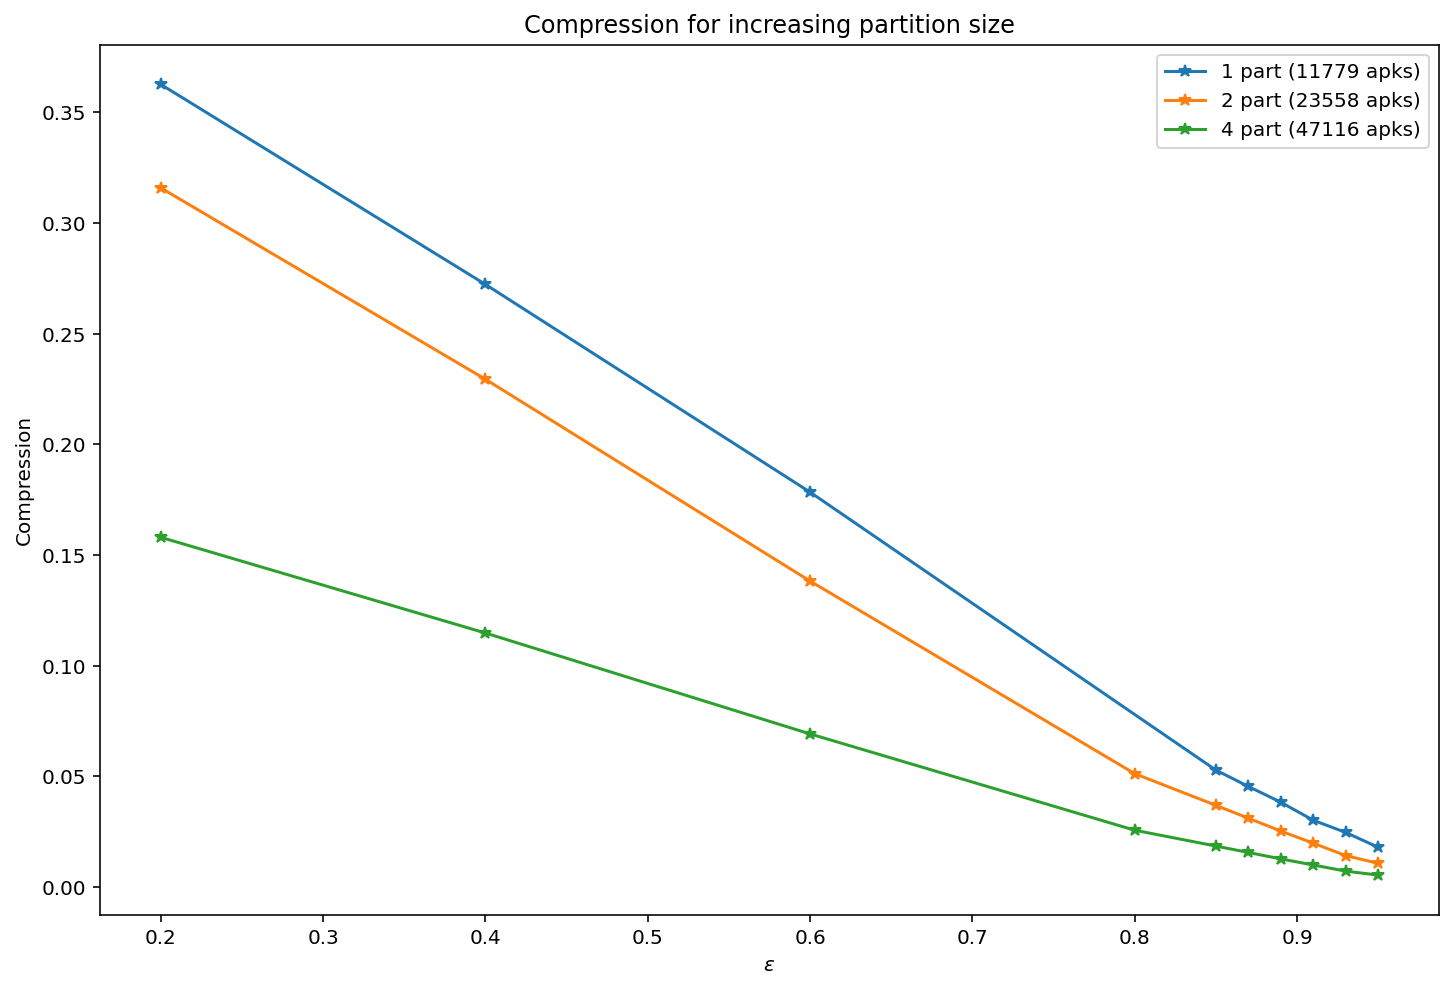

In [88]:
plt.figure(figsize=(12,8))
plt.title(f"Compression for increasing partition size")
plt.xlabel(f"$\epsilon$")
plt.ylabel('Compression')

plt.plot(res.keys(), list(map(lambda x: x/k1, res.values())),'-*', label=f"1 part ({k1} apks)");
plt.plot(res2.keys(), list(map(lambda x: x/k2, res2.values())),'-*', label=f"2 part ({k2} apks)");
plt.plot(res3.keys(), list(map(lambda x: x/k3, res2.values())),'-*', label=f"4 part ({k3} apks)");


plt.legend();


In [89]:
#merged-th15_ref.pickle
#stream-th15_aggreg.pickle
with open('../res/newres/new_merged_merged.pickle', 'rb') as f:
    nets_merged = pickle.load(f)
    
with open('../res/newres/new_merged_ref.pickle', 'rb') as f:
    nets_reference = pickle.load(f)
    
with open('../res/newres/new_streamed_vot.pickle', 'rb') as f:
    nets_streamed = pickle.load(f)

size = sum(map(sum, nets_reference[0.0].values()))

comp_merged = {gamma: len(net) for gamma, net in nets_merged.items()}
comp_ref = {gamma: len(net) for gamma,net in nets_reference.items()}
comp_stream = {gamma: len(net) for gamma,net in nets_streamed.items()}

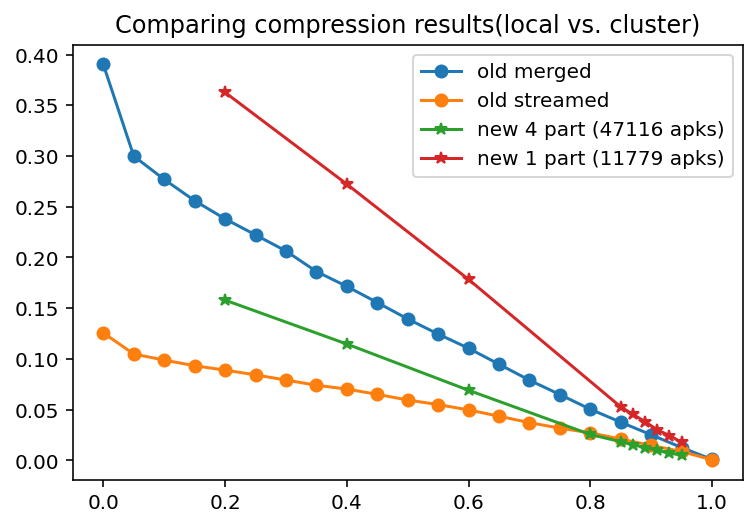

In [90]:
plt.title("Comparing compression results(local vs. cluster)")
plt.plot(list(comp_merged.keys()), np.array(list(comp_merged.values()))/size,'-o', label='old merged')
#plt.plot(list(comp_ref.keys()), np.array(list(comp_ref.values()))/size,'-o', label='reference')
plt.plot(list(comp_stream.keys()), np.array(list(comp_stream.values()))/size,'-o', label='old streamed')
plt.plot(res3.keys(), list(map(lambda x: x/k3, res2.values())),'-*', label=f"new 4 part ({k3} apks)");
plt.plot(res.keys(), list(map(lambda x: x/k1, res.values())),'-*', label=f"new 1 part ({k1} apks)");
plt.legend();

In [14]:
apks = pd.read_csv('../res/newclusterres/apks.csv', index_col=0)

In [15]:
f_size  =apks.shape[0]
print(f"Full data set has {f_size} apks")

Full data set has 189452 apks


In [93]:
sizes_merged = dict()
sizes_merged[0.65] = 8553
sizes_merged[0.75] = 4594
sizes_merged[0.85] = 1999

sizes_streamed = dict()
sizes_streamed[0.65] = 1799
sizes_streamed[0.75] = 1135
sizes_streamed[0.85] = 621


In [151]:
import matplotlib as mpl

mpl.use('svg')
new_rc_params = {
    "font.family": 'Times', #probably python doesn't know Times, but it will replace it with a different font anyway. The final decision is up to the latex document anyway
    "font.size": 14, #choosing the font size helps latex to place all the labels, ticks etc. in the right place
    "font.serif": [],
    "svg.fonttype": 'none',
    "lines.linewidth":2,
"lines.color":'k'} #to store text as text, not as path
mpl.rcParams.update(new_rc_params)

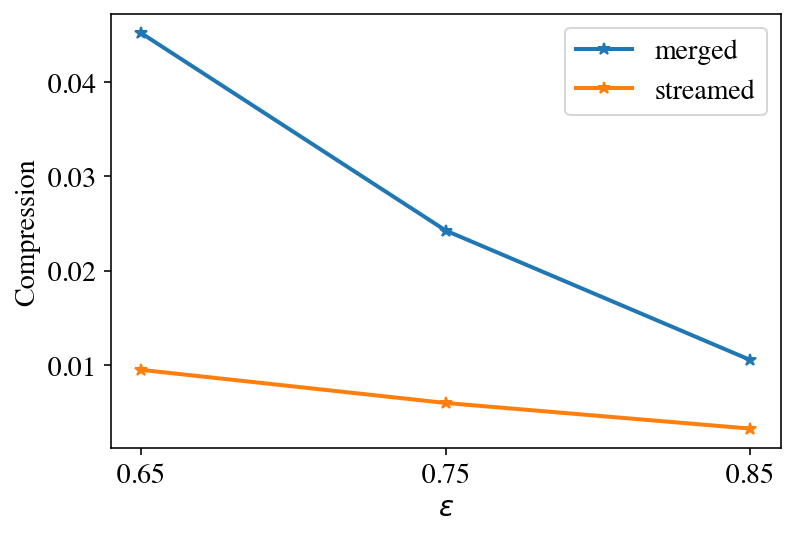

In [140]:
plt.plot(list(sizes_merged.keys()), list(map(lambda x: x/f_size, sizes_merged.values())),'-*' , label='merged')
plt.plot(list(sizes_streamed.keys()), list(map(lambda x: x/f_size, sizes_streamed.values())),'-*' , label='streamed')
plt.xlabel("$\epsilon$")
plt.xticks(list(sizes_merged.keys()))
plt.ylabel('Compression')

plt.legend();
plt.savefig('../fig/full_compression.svg', format='svg', bbox_inches = 'tight', dpi=1000)

## Network merging

> 2021-05-16 15:08:07,218 root INFO Loading networks 0.85

> 2021-05-16 15:08:08,165 root INFO Starting to merge 16 nets with gamma=0.85

> 2021-05-16 15:16:45,158 root INFO Starting network creation with k=10217

> 2021-05-16 15:23:37,005 root INFO Saved network with 1999

In [11]:
## Prec-recall for streamed network

In [5]:
#import graphlab as tc
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc
import pickle
import turicreate as tc
import pandas as pd
import re
import glob

In [6]:
labels = pd.read_csv('../res/newclusterres/apks_labels_hashed.csv', index_col=0)

In [7]:
def read_and_conv(fname, labels):
    with open(fname, 'rb') as f:
        eres = pickle.load(f)
    tblre = dict()
    for r, val in eres:
        tblre[r['apk']] = [r['nn'], val, not labels.loc[r['apk']]['malware_label']]
    return pd.DataFrame.from_dict(tblre, orient='index', columns=[ 'nearest', 'prob', 'true_val'])

In [8]:
def process_filelist(fnames, prefix):
    dfs = list()
    res = dict()
    for fname in fnames:
    
        df = read_and_conv(fname=fname, labels=labels)
        dfs.append(dfs)
        [p1, r1, thresholds] = precision_recall_curve(df['true_val'], df['prob'])
        auc1 = auc(r1, p1)

        g = float(re.findall("\d+\.\d+", fname)[0])
        res[f"{prefix}-{g}"] = [p1, r1, auc1]
    
    return [dfs, res]

In [99]:

stream_dfs, stream_res = process_filelist(fnames=glob.glob('../res/newclusterres/streamed*.pickle'), prefix='streamed')

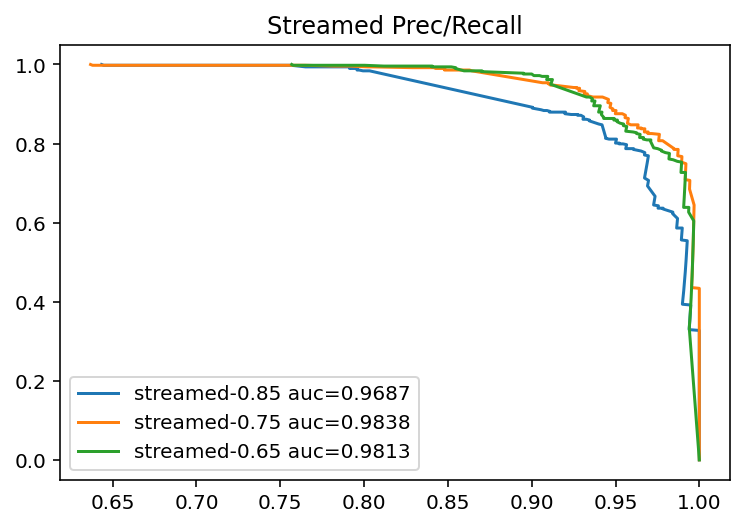

In [100]:
plt.title(f"Streamed Prec/Recall")
for k, v in stream_res.items():
    [p1, r1, auc1] = v
    plt.plot(p1, r1, label=f"{k} auc={auc1:.4f}")

plt.legend();

# merged

In [102]:
dfs, res= process_filelist(fnames=glob.glob('../res/newclusterres/merged-*evalresults.pickle'), prefix='merged')

In [ ]:
! ls ../res/newclusterres/mer

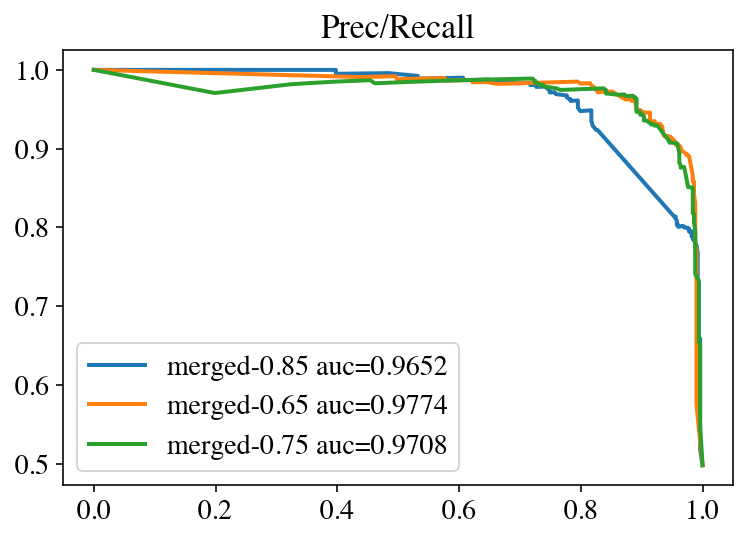

In [133]:
plt.title(f"Prec/Recall")
for k, v in res.items():
    [p1, r1, auc1] = v
    plt.plot(r1, p1, label=f"{k} auc={auc1:.4f}")

plt.legend();

In [104]:
m = {**res, **stream_res}

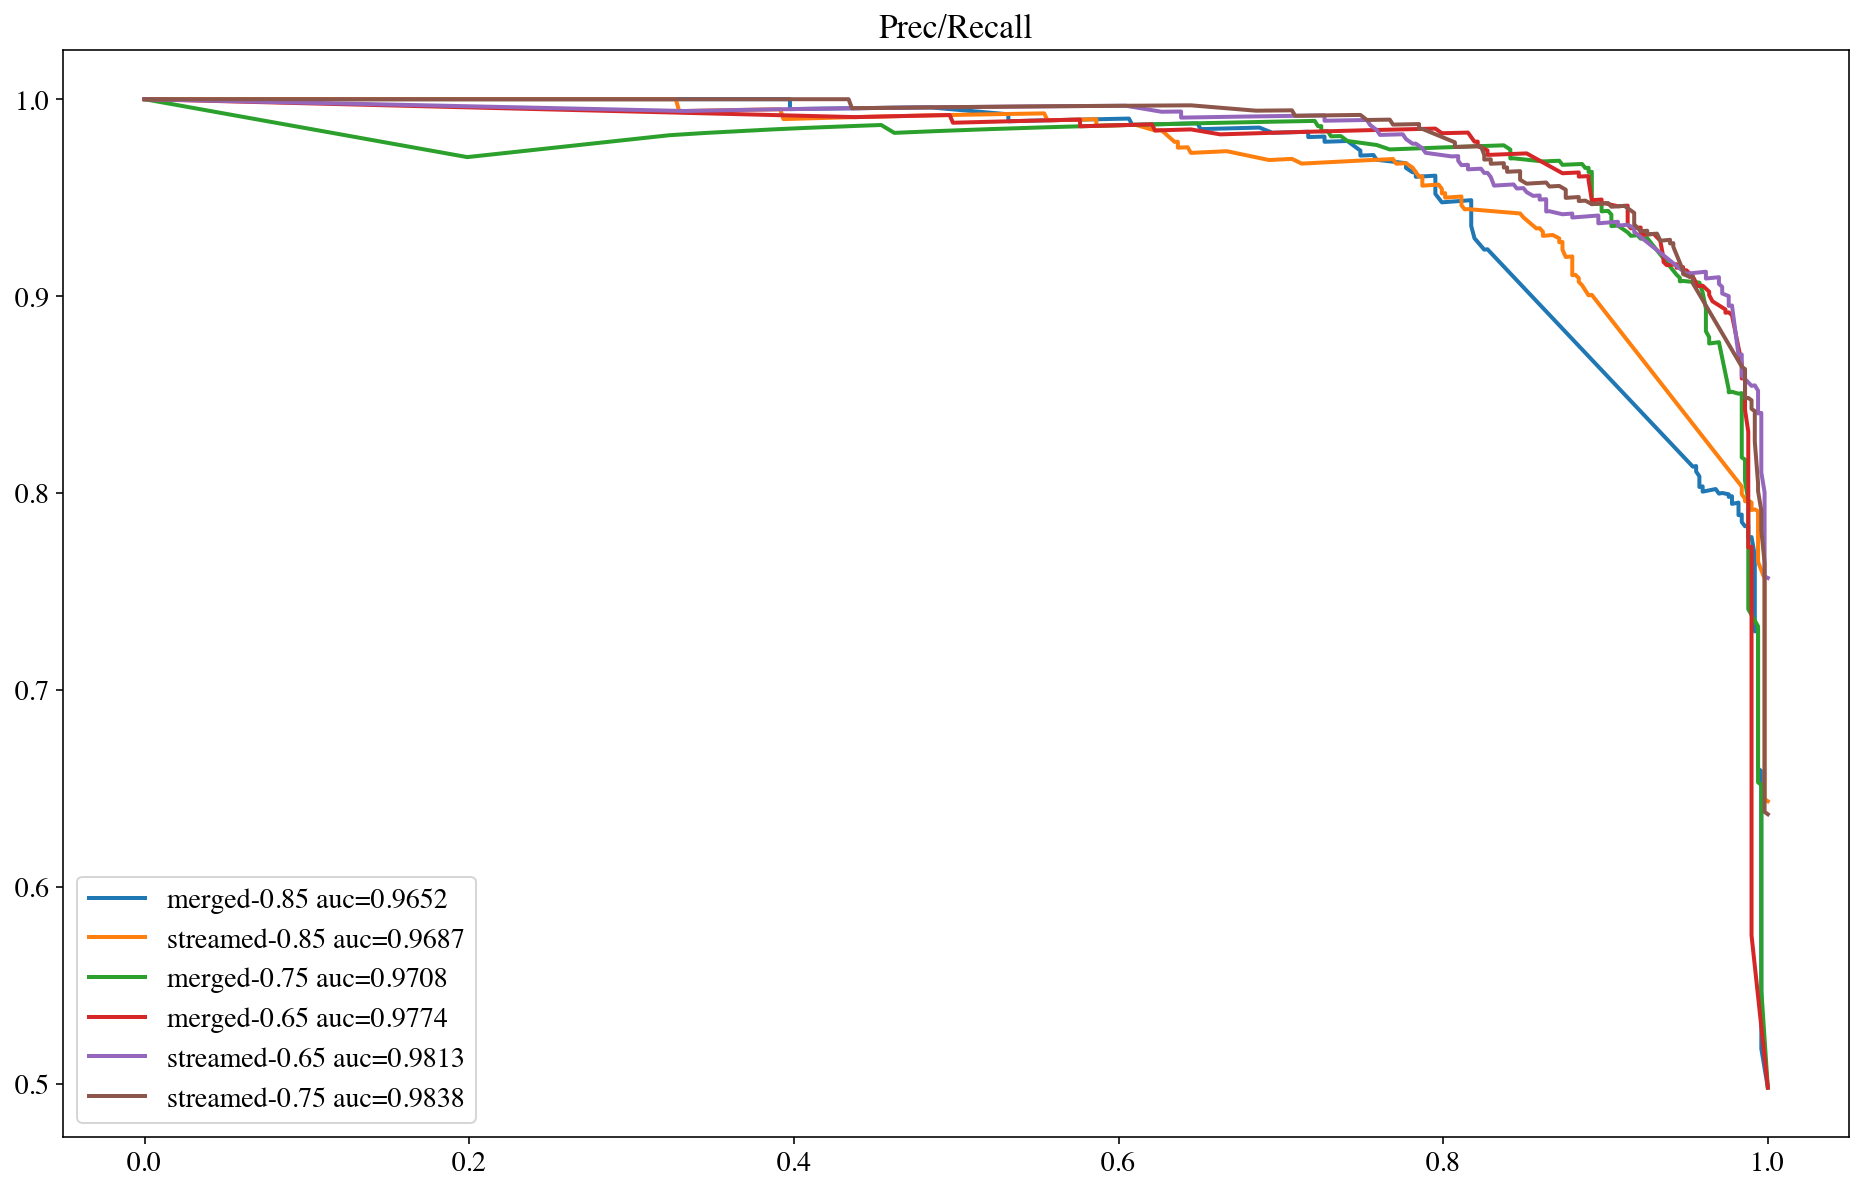

In [134]:
m2 = dict(sorted(m.items(), key=lambda x: x[1][2]))
plt.figure(figsize=(16,10))
plt.title(f"Prec/Recall")
for k, v in m2.items():
    [p1, r1, auc1] = v
    plt.plot(r1, p1, label=f"{k} auc={auc1:.4f}")

plt.legend();

In [115]:
## Compare with old

In [107]:
# new results
with open('../res/newres/probs_new_merged.pickle', 'rb') as f:
    merged_probs = pickle.load(f)
    
with open('../res/newres/probs-new-streamed.pickle', 'rb') as f:
    stream_probs = pickle.load(f)
    
with open('../res/newres/probs_new_ref.pickle', 'rb') as f:
    ref_probs = pickle.load(f)

In [108]:
gammas = list(ref_probs.keys())[:-1]
to_plot=dict()

for gamma in gammas:
    probs, true_vals = ref_probs[gamma]
    [p1, r1, thresholds] = precision_recall_curve(true_vals, probs)
    auc1 = auc(r1, p1)
    
    probs, true_vals = merged_probs[gamma]
    [p2, r2, thresholds] = precision_recall_curve(true_vals, probs)
    auc2 = auc(r2, p2)
    
    probs, true_vals = stream_probs[gamma]
    [p3, r3, thresholds] = precision_recall_curve(true_vals, probs)
    auc3 = auc(r3, p3)

    to_plot[gamma] = [p1, r1, auc1, p2, r2, auc2, p3, r3, auc3]

In [109]:
aucs = dict()
for gamma, [p1, r1, auc1, p2, r2, auc2, p3, r3, auc3]  in to_plot.items():
    aucs[gamma] = [auc1, auc2, auc3]

df = pd.DataFrame.from_dict(aucs, orient='index', columns=['auc_ref', 'auc_mer', 'auc_stream'])

In [110]:
m2.keys()

dict_keys(['merged-0.85', 'streamed-0.85', 'merged-0.75', 'merged-0.65', 'streamed-0.65', 'streamed-0.75'])

In [141]:

[ref_p, ref_r, auc1, merged_p, merged_r, auc2, streamed_p, streamed_r, auc3] = to_plot[0.65]
[new_m_p1, new_m_r1, auc_m] = m2['merged-0.65']
[new_s_p1, new_s_r1, auc_s] = m2['streamed-0.65']


In [112]:
m2.keys()

dict_keys(['merged-0.85', 'streamed-0.85', 'merged-0.75', 'merged-0.65', 'streamed-0.65', 'streamed-0.75'])

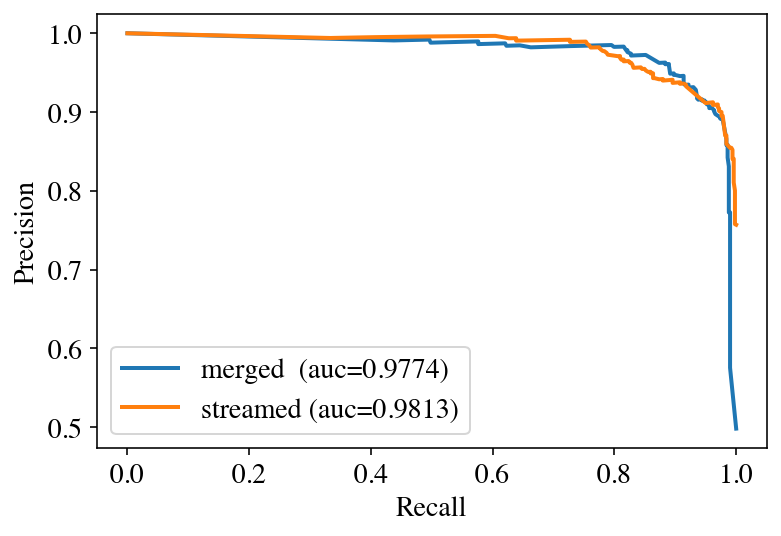

In [153]:
#plt.figure(figsize=(12,8))
#plt.title("Precision recall for different networks at $\epsilon$=0.65")
#plt.plot(ref_p, ref_r, label=f"old_reference  ")
#plt.plot(merged_p, merged_r, label=f"old_merged  ")
#plt.plot(streamed_p, streamed_r, label=f"old_streamed  ")

plt.plot( new_m_r1,new_m_p1, label=f"merged  (auc={auc_m:.4f})")
plt.plot(new_s_r1, new_s_p1, label=f"streamed (auc={auc_s:.4f})")

plt.legend(loc=3);
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.savefig('../fig/full_pre_re.svg', format='svg', bbox_inches = 'tight', dpi=1000);

## performance/model size

In [2]:
from utils import load_net

## 2nd run

In [9]:
#glob.glob('../res/newclusterres/streamed-0.65-0.2/')
fnames = dict()
aucs = dict()
sizes = dict()
gammas = [0.65, 0.75, 0.85]
for p_size in list(range(2,10,2))+[5]:
    a = list()
    b = list()
    c = list()
    for gamma in gammas:
        curr_name = f"../res/newclusterres/2ndrun/streamed-{gamma}-{p_size}/{gamma}-{p_size}-evalresults.pickle"

        net_name = f"../res/newclusterres/2ndrun/streamed-{gamma}-{p_size}/merged-{gamma}-0-tc-nets-voting.pickle"
        _, net = load_net(net_name)
        c.append(len(net))
        a.append(curr_name)
        df = read_and_conv(curr_name, labels)
        [p1, r1, thresholds] = precision_recall_curve(df['true_val'], df['prob'])
        b.append(auc(r1, p1))
        
    fnames[p_size] = a
    aucs[p_size] = b
    sizes[p_size] = c
    

In [11]:
del sizes[6]
del sizes[5]
del aucs[6]
del aucs[5]

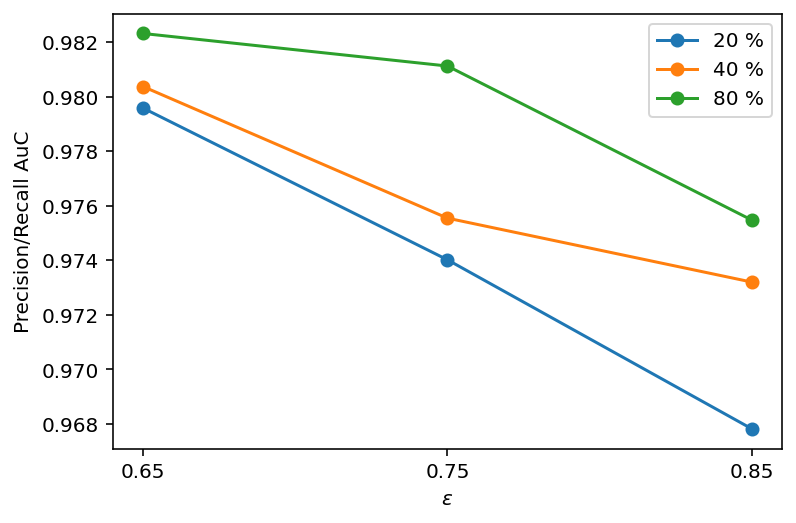

In [12]:
#plt.title('Performance for different sizes of the origin network')
for k, mauc in aucs.items():
    plt.plot(gammas, mauc,'-o', label=f"{k*10} %")

plt.xlabel(f"$\epsilon$")
plt.ylabel('Precision/Recall AuC')
plt.xticks(gammas)
plt.legend();
plt.savefig('../fig/part_auc.svg', format='svg', bbox_inches = 'tight', dpi=1000);

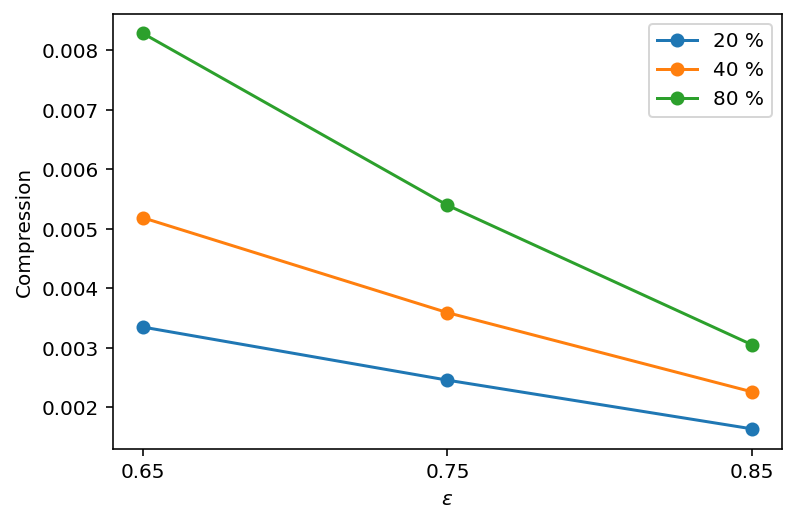

In [16]:
#plt.title('Size of the final model for different sizes of the origin network')
for k, ss in sizes.items():
    plt.plot(gammas, list(map(lambda x: x/f_size, ss)),'-o', label=f"{k*10} %")
    
plt.xlabel(f"$\epsilon$")
plt.xticks(gammas)
plt.ylabel('Compression')
plt.legend();
plt.savefig('../fig/part_comp.svg', format='svg', bbox_inches = 'tight', dpi=1000);

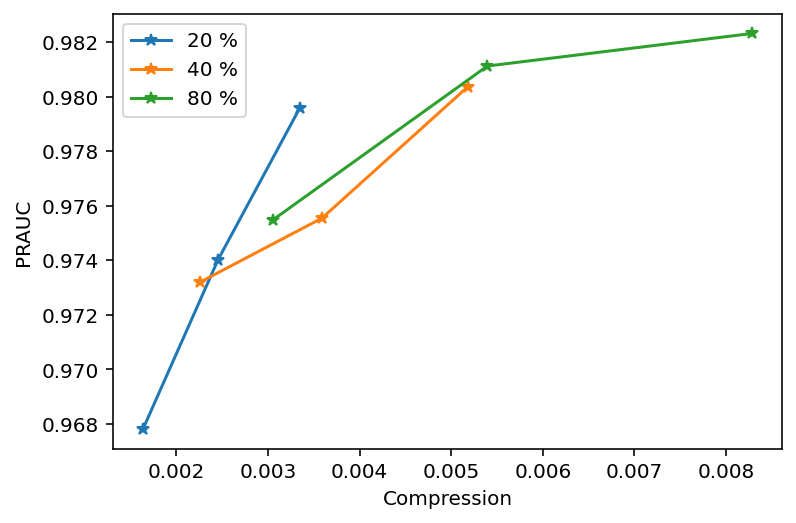

In [17]:
#PRAUC on y axis and compression on the x axis


for k, ss in sizes.items():
    plt.plot(list(map(lambda x: x/f_size, ss)), aucs[k],'-*', label=f"{k*10} %")
    
plt.legend()
plt.xlabel('Compression')
plt.ylabel('PRAUC');